In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df18 = pd.read_csv("./data/df18.csv",index_col="Unnamed: 0")
df50 = pd.read_csv("./data/df50.csv",index_col="Unnamed: 0")
df101 = pd.read_csv("./data/df101.csv",index_col="Unnamed: 0")
pred = pd.read_csv("./data/pred.csv",index_col="Unnamed: 0")
unc_pred = pd.read_csv("./data/unc_pred.csv",index_col="Unnamed: 0")
display(df18.head(1))
display(df50.head(1))
display(df101.head(1))
display(pred.head(1))
display(unc_pred.head(1))

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,...,class_247,class_248,class_249,class_250,class_251,class_252,class_253,class_254,class_255,class_256
2095,0.000005,0.000013,0.000019,0.000017,0.000021,0.000006,0.000012,0.993818,0.000088,0.000024,...,0.000002,0.000014,0.000027,0.000017,0.000021,0.000025,0.000013,0.00001,0.000031,0.00001


,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,...,class_247,class_248,class_249,class_250,class_251,class_252,class_253,class_254,class_255,class_256
2095,0.000209,0.000354,0.000134,0.000203,0.000268,0.000119,0.000159,0.932014,0.000284,0.000182,...,0.00022,0.000483,0.000343,0.000384,0.000209,0.000334,0.000308,0.000252,0.000172,0.000186


,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,...,class_247,class_248,class_249,class_250,class_251,class_252,class_253,class_254,class_255,class_256
2095,0.000012,0.000013,0.000018,0.000009,0.000027,0.000012,0.000012,0.996404,0.000008,0.000009,...,0.000013,0.000005,0.000004,0.00001,0.000012,0.000018,0.000009,0.000017,0.00003,0.000013


,pred18,pred50,pred101,target,soft_vote,weighted_vote,min_entropy_pred,unc_weighted_vote,kl_weighted_vote,ce_weighted_vote,kl_sqr_weighted_vote,kl_acc_weighted_vote,ent_kl_weighted_vote,kl_ent_weighted_vote
2095,7,7,7,7,7,7,7,7,7,7,7,7,7,7


,kl_18_101,kl_101_18,kl_18_50,ent_18,ent_50,ent_101,ce_18_101,ce_101_18
2095,0.005454,0.003145,0.053256,0.066042,0.612255,0.041488,0.071496,0.044633


In [3]:
def calc_tpr(targ, pred):
    tp = np.sum((targ == 1) & (pred == 1))
    fn = np.sum((targ == 1) & (pred == 0))
    return tp / (tp + fn)
def calc_fpr(targ, pred):
    fp = np.sum((targ == 0) & (pred == 1))
    tn = np.sum((targ == 0) & (pred == 0))
    return fp / (fp + tn)
def predict_correctness(ent_ls,threshold):
    return np.where(ent_ls>threshold,0,1)
def auroc(pred_vec, target_vec, unc_vec, label):
    cor_pred = np.where(pred_vec == target_vec, 1, 0)
    max_unc = unc_vec.max()
    min_unc = unc_vec.min()
    tpr = np.array([]) 
    fpr = np.array([])

    for ent_step in np.arange(min_unc, max_unc, 0.1):
        temp = predict_correctness(unc_vec, ent_step)
        tpr = np.append(tpr, calc_tpr(cor_pred, temp))
        fpr = np.append(fpr, calc_fpr(cor_pred, temp))
    
    area = np.trapz(tpr, fpr)
    sns.lineplot(x=fpr, y=tpr, label=f"{label} (AUC: {area:.2f})")
    return area

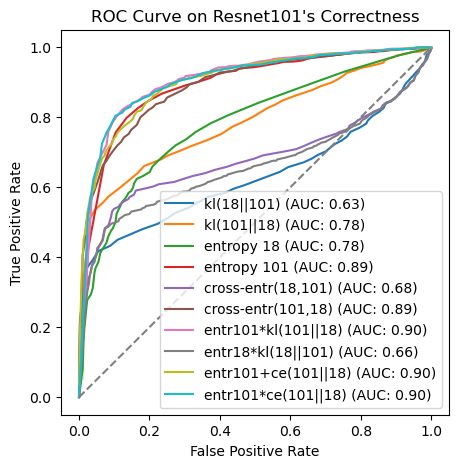

In [4]:
plt.figure(figsize=[5,5])
auroc(pred["pred101"], pred["target"], unc_pred["kl_18_101"], "kl(18||101)")
auroc(pred["pred101"], pred["target"], unc_pred["kl_101_18"], "kl(101||18)")
auroc(pred["pred101"], pred["target"], unc_pred["ent_18"], "entropy 18")
auroc(pred["pred101"], pred["target"], unc_pred["ent_101"], "entropy 101")
auroc(pred["pred101"], pred["target"], unc_pred["ce_18_101"], "cross-entr(18,101)")
auroc(pred["pred101"], pred["target"], unc_pred["ce_101_18"], "cross-entr(101,18)")
auroc(pred["pred101"], pred["target"], unc_pred["ent_101"] * unc_pred["kl_101_18"], "entr101*kl(101||18)")
auroc(pred["pred101"], pred["target"], unc_pred["ent_18"] * unc_pred["kl_18_101"], "entr18*kl(18||101)")
auroc(pred["pred101"], pred["target"], unc_pred["ent_101"] + unc_pred["ce_101_18"], "entr101+ce(101||18)")
auroc(pred["pred101"], pred["target"], unc_pred["ent_101"] * unc_pred["ce_101_18"], "entr101*ce(101||18)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Resnet101's Correctness")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.show()

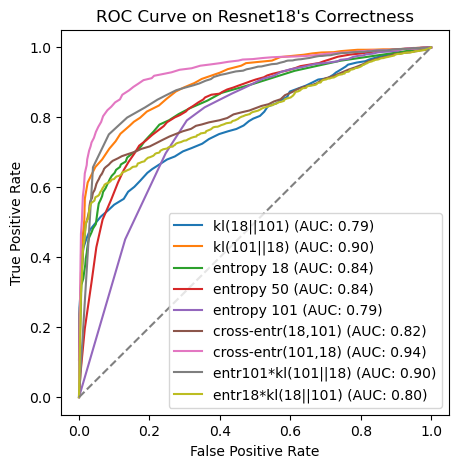

In [5]:
plt.figure(figsize=[5,5])
auroc(pred["pred18"], pred["target"], unc_pred["kl_18_101"], "kl(18||101)")
auroc(pred["pred18"], pred["target"], unc_pred["kl_101_18"], "kl(101||18)")
auroc(pred["pred18"], pred["target"], unc_pred["ent_18"], "entropy 18")
auroc(pred["pred18"], pred["target"], unc_pred["ent_50"], "entropy 50")
auroc(pred["pred18"], pred["target"], unc_pred["ent_101"], "entropy 101")
auroc(pred["pred18"], pred["target"], unc_pred["ce_18_101"], "cross-entr(18,101)")
auroc(pred["pred18"], pred["target"], unc_pred["ce_101_18"], "cross-entr(101,18)")
auroc(pred["pred18"], pred["target"], unc_pred["ent_101"] * unc_pred["kl_101_18"], "entr101*kl(101||18)")
auroc(pred["pred18"], pred["target"], unc_pred["ent_18"] * unc_pred["kl_18_101"], "entr18*kl(18||101)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Resnet18's Correctness")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.show()